# Iris 데이터에 대한 Clustering

## 데이터 로드

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width','Petal length','Petal width']
data = pd.concat([data, labels], axis=1)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
feature = data.iloc[:, :-1]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## DBSCAN Clustering 적합

In [9]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.5, min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns = ['predict']

# concatenate labels to df as a new column
r = pd.concat([feature, predict], axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


## 시각화

### Clustering 결과 시각화

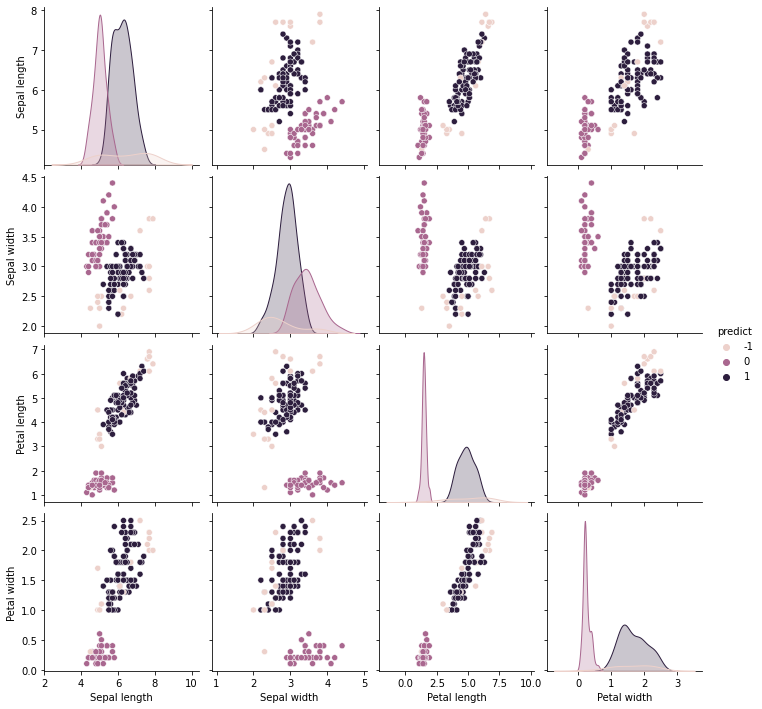

In [10]:
sns.pairplot(r, hue='predict')
plt.show()

-> 그렇게 잘 분류되진 않았음을 확인할 수 있음

### 실제 데이터 시각화

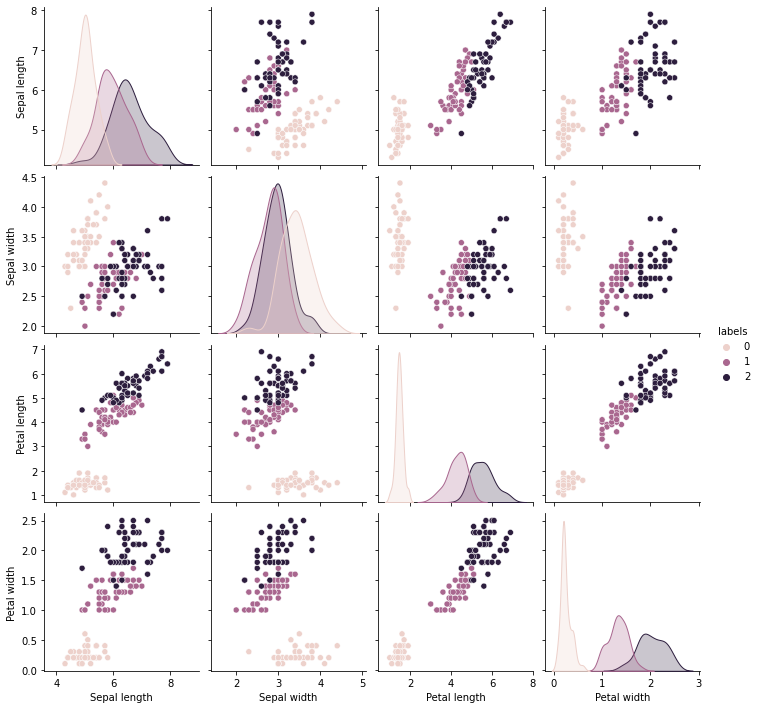

In [12]:
sns.pairplot(data, hue='labels')
plt.show()

## K-means Clustering과 비교

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=21)
km.fit(feature)

KMeans(n_clusters=3, random_state=21)

In [19]:
new_labels =pd.DataFrame(km.labels_)
new_labels.columns=['predict']
r2 = pd.concat([feature,new_labels],axis=1)

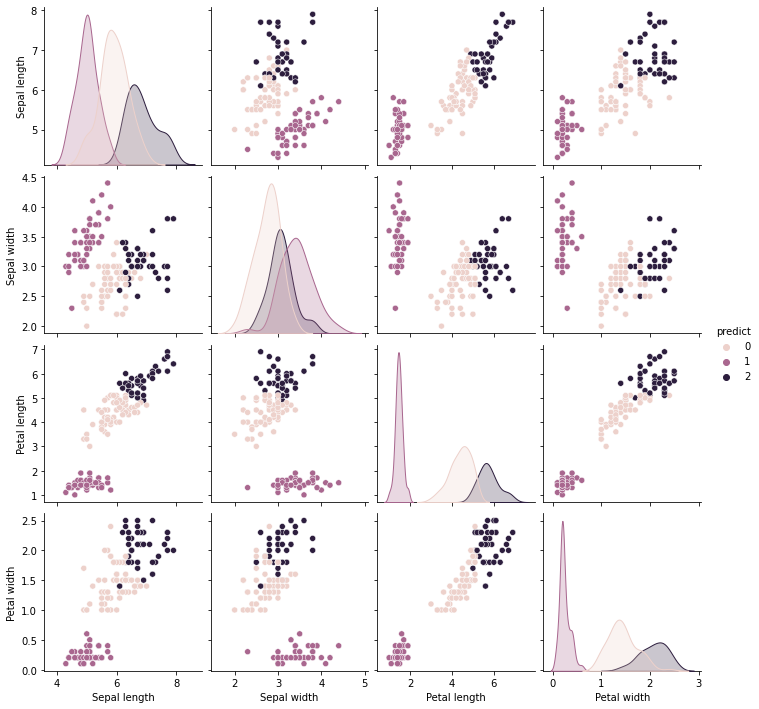

In [20]:
sns.pairplot(r2,hue='predict')
plt.show()

-> 오히려 k-means의 적합 결과가 더 좋은 것을 확인할 수 있다

k-means는 각 군집별로 데이터를 균일하게 분류하는 편이다.  
하지만 DBSCAN은 붙어 있는 데이터는 모두 같은 군집으로 확장해나가는 방식이기 때문에 DBSCAN의 성능이 더 좋지 않았다.

# 군집화 데이터에 대한 Clustering

## 데이터 로드 및 전체 분포 확인

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
sns.set_context('poster')   # 글씨가 커지는 효과
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

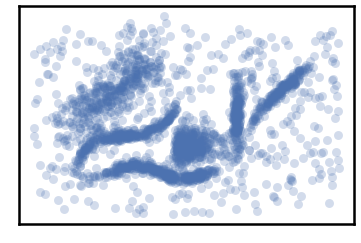

In [24]:
data = np.load('./data/clusterable_data.npy')
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

## 알고리즘에 따라 Clustering 후 시각화 하는 함수 정의

In [63]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)   # 지정한 algorithm에 따라 clustering
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)   # label의 수만큼 color 생성
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]  # 분류된 데이터에 대해서 color 지정
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)  # plot의 제목 표시
    plt.text(-0.5, 0.6, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)  # Clustering에 걸린 시간 표시

## K-means를 이용한 Clustering

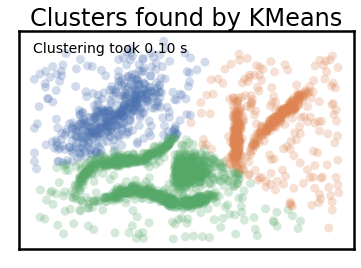

In [64]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters': 3})

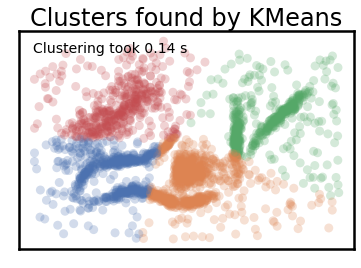

In [65]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters': 4})

-> 파란색 부분과 노란색 부분은 적절치 않게 분류된 것으로 보인다

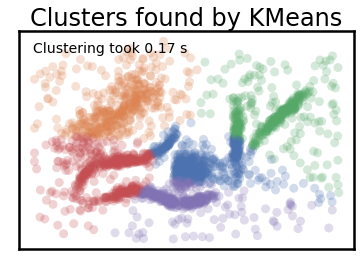

In [66]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters': 5})

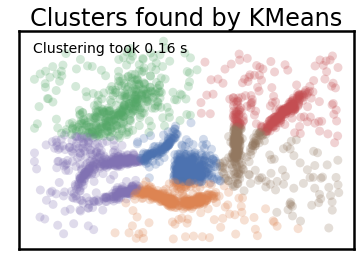

In [67]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters': 6})

## DBSCAN을 이용한 Clustering

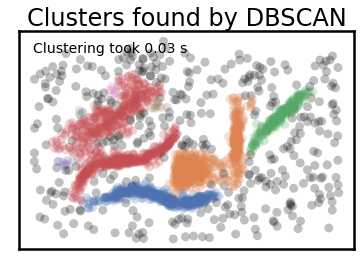

In [68]:
plot_clusters(data, cluster.DBSCAN, (), {'eps': 0.025})

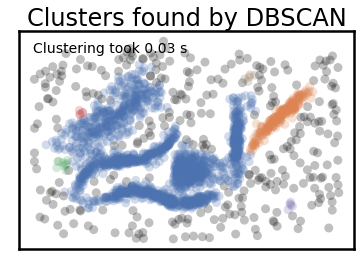

In [69]:
plot_clusters(data, cluster.DBSCAN, (), {'eps': 0.03})

-> eps 값을 높이면 좀 더 많은 데이터를 하나의 군집으로 파악한다

## HDBSCAN을 이용한 Clustering

 HDBSCAN : DBSCAN의 발전된 버전, 하이퍼 파라미터에 덜 민감함

In [38]:
import hdbscan

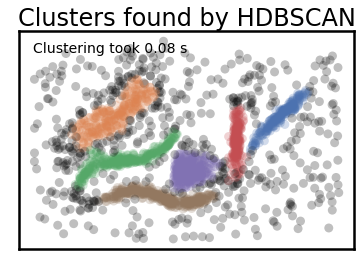

In [70]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 15})